# Creating a Neural Network for Image Classification 

In this notebook, we'll learn how to create a neural network for multi-categorical image classification using the FashionMNIST dataset. Our neural network will look slightly different because we have to flatten our image data into a single vector before our model can make sense of the data it's being fed. Thankfully, many of the other concepts that we covered in previous chapters still show up here!

The next chapter will explore a convolutional neural network using the same dataset as here. 


As usual, we import necessary libraries here.

In [1]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.preprocessing import OneHotEncoder

## Load the dataset

The FashionMNIST dataset is already split up into training and test datasets for us, so we don't have to do any processing in splitting up our data.

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

# 60,000 training images, 10,000 test images
(training_imgs, training_labels), (test_imgs, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


## Explore the data

Each image is a 28x28 grayscale image that is associated with 10 different classes.

Let's look at what one of these images looks like. If you'd like to view other samples, feel free the change the index of the `training_imgs` array to view another item. 

Note that `plt.imshow` will colorgrade the image so that it is no longer grayscale.

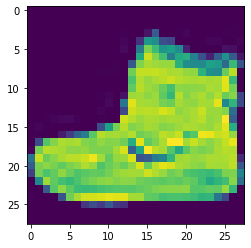

In [3]:
plt.imshow(training_imgs[0]) 

## Processing data

Even though our data has already been split up into testing and training data, there's still a little bit more pre-processing that we need to get done. 

We want to reshape our array to make sure that every image in the array matches our expected dimensions and so that training our model goes smoothly. We then divide every image in our training images and test images by `255` to normalize our values between 0 and 1. For reference, `0 - 255` is the range for RGB values. 

Afterwards, we want to encode our labels per usual to be a `0` or `1` accordingly so we can tell which class the item belongs to.

In [4]:
training_imgs = training_imgs.reshape((training_imgs.shape[0], 28, 28, 1))
training_imgs = training_imgs/255.0
test_imgs = test_imgs/255.0

In [5]:
encoder1 = OneHotEncoder(sparse=False)
encoder2 = OneHotEncoder(sparse=False)
training_labels = training_labels.reshape(-1, 1)
test_labels = test_labels.reshape(-1, 1)
training_labels = encoder1.fit_transform(training_labels)
test_labels = encoder2.fit_transform(test_labels)

## Building a neural network for image classification 

Now we can build a new neural network model for image classification! The input layer is a flattening layer so that our `28x28` pixel image is transformed into a single vector of size `(None, 784)` which can be seen from the model summary. You can learn more about the Flatten layer through the [Keras documentation](https://keras.io/api/layers/reshaping_layers/flatten/). Next, we include a hidden layer per usual with `ReLU` activation. Our last layer is an output layer with 10 nodes, one for each class, and `softmax` activation to normalize our input between 0 and 1. 

As usual, we use the `sgd` optimizer and categorical cross-entropy as our loss function.

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28), name='input'), # image is 28x28 pixels
    tf.keras.layers.Dense(128, activation='relu', name='hidden-1'),
    tf.keras.layers.Dense(10, activation='softmax', name='output')
])

In [7]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Flatten)              (None, 784)               0         
_________________________________________________________________
hidden-1 (Dense)             (None, 128)               100480    
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


We can look at the output of our hidden layer, although it will be a bit difficult to read since we have 10 different classes this time. 

In [ ]:
predictions = model(training_imgs)
tf.nn.softmax(predictions[:5])

## Train the model 

Now, we can traing our model. As always, feel free to adjust the learning parameters and see how that affects the loss and accuracy of the model moving forward. You can also change the optimizer and loss function.

In [8]:
hist = model.fit(training_imgs, training_labels, verbose=1, batch_size=32, epochs=20, validation_split=0.3)

Epoch 1/20
1313/1313 [==============================] - 5s 3ms/step - loss: 1.1410 - accuracy: 0.6415 - val_loss: 0.5906 - val_accuracy: 0.8050
Epoch 2/20
1313/1313 [==============================] - 2s 2ms/step - loss: 0.5630 - accuracy: 0.8125 - val_loss: 0.5201 - val_accuracy: 0.8247
Epoch 3/20
1313/1313 [==============================] - 2s 2ms/step - loss: 0.4992 - accuracy: 0.8313 - val_loss: 0.4843 - val_accuracy: 0.8346
Epoch 4/20
1313/1313 [==============================] - 3s 2ms/step - loss: 0.4629 - accuracy: 0.8418 - val_loss: 0.4647 - val_accuracy: 0.8376
Epoch 5/20
1313/1313 [==============================] - 2s 2ms/step - loss: 0.4531 - accuracy: 0.8431 - val_loss: 0.4435 - val_accuracy: 0.8463
Epoch 6/20
1313/1313 [==============================] - 2s 2ms/step - loss: 0.4328 - accuracy: 0.8518 - val_loss: 0.4599 - val_accuracy: 0.8408
Epoch 7/20
1313/1313 [==============================] - 3s 2ms/step - loss: 0.4226 - accuracy: 0.8547 - val_loss: 0.4257 - val_accuracy:

We can now plot the relationship between loss, accuracy, and our current epoch.

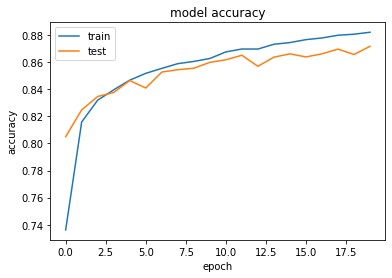

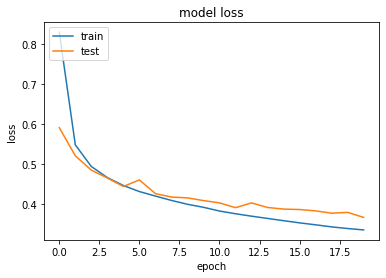

In [9]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

## Evaluate the model 

Once our model has been trained with our training data, we can see how the model performs with our test set. You can view the classification report printed, as well as the raw confidence scores for a few images. 

In [95]:
testingPredictions = model.predict(test_imgs)
testingPredictions = list(testingPredictions.argmax(axis=-1))
confidence_scores = model.predict(test_imgs, batch_size=32)

In [99]:
from sklearn.metrics import classification_report

print(classification_report(test_labels.argmax(axis=-1), testingPredictions, target_names=target_names))

              precision    recall  f1-score   support

 T-shirt/top       0.81      0.82      0.82      1000
     Trouser       0.99      0.96      0.97      1000
    Pullover       0.77      0.79      0.78      1000
       Dress       0.87      0.85      0.86      1000
        Coat       0.79      0.77      0.78      1000
      Sandal       0.95      0.94      0.94      1000
       Shirt       0.65      0.66      0.65      1000
     Sneaker       0.92      0.93      0.92      1000
         Bag       0.94      0.96      0.95      1000
  Ankle boot       0.94      0.96      0.95      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [96]:
np.set_printoptions(suppress=True)
print(confidence_scores)


[[0.00000729 0.00000009 0.00000275 ... 0.06012471 0.00154842 0.8761682 ]
 [0.00009534 0.00000013 0.98821205 ... 0.         0.00001153 0.        ]
 [0.00005938 0.99992764 0.00000173 ... 0.00000001 0.00000101 0.        ]
 ...
 [0.02944808 0.00000466 0.00140015 ... 0.00001671 0.951989   0.00000038]
 [0.00001509 0.9985979  0.0000077  ... 0.00000261 0.00000638 0.00000044]
 [0.00012927 0.00006131 0.00038427 ... 0.05729564 0.01049629 0.00277568]]


Because we're now working with image data, there's a bit more we can do to help visualize what this output really represents and how accurate our model is. Below, we've plotted the first 15 categorizations from our neural network. Feel free to play around with viewing more images and their categorizations. 

A blue bar represents an accurate output from our model while a red bar represents an incorrect output.

In [97]:
target_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

def plot_image(i, predictions_array, confidence_scores, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)


  #predicted_label = np.argmax(predictions_array)
  #print(predicted_label, true_label)
  if predictions_array[i] == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(target_names[predictions_array[i]],
                                100*np.max(confidence_scores[i]),
                                target_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

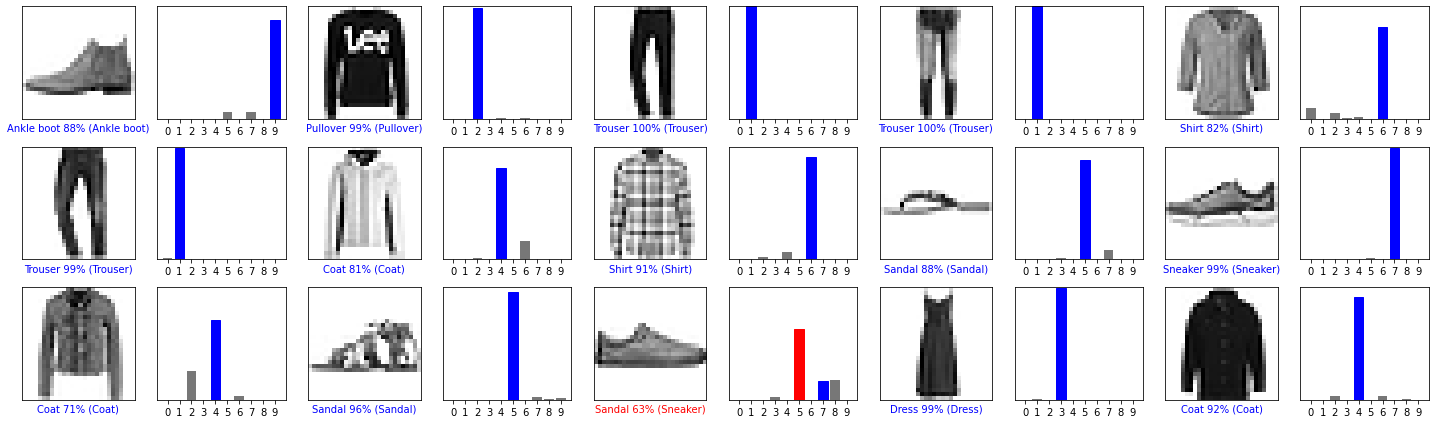

In [98]:
num_rows = 3
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
vec = np.vectorize(confidence_scores)
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, testingPredictions, confidence_scores, test_labels.argmax(axis=-1), test_imgs)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, list(confidence_scores)[i], test_labels.argmax(axis=-1))
plt.tight_layout()
plt.show()

Now, we need to export the data in order to support some interactive visualizations that we've created. Feel free to skip over this code block and move to the interactive visualizations below.

In [100]:
# output data as json 
import json
import os
import sys

output_directory = "libraries/"
output_filename = "predict_img_nn.json"
full_path = os.path.join(output_directory, output_filename)

true_label = []
for i in range(len(test_labels)):
    for j in range(len(test_labels[i])):
        if test_labels[i][j] == 1:
            true_label.append(target_names[j])

for i in range(len(testingPredictions)):
    target_i = testingPredictions[i]
    testingPredictions[i] = target_names[target_i]

data = []
data.extend([{
      'index': i,
      'true_label': true_label[i],
      'predicted_label': testingPredictions[i],
      'confidence_score': confidence_scores.tolist()[i]
  } for i in range(len(testingPredictions))])



with open(full_path, 'w') as outfile:
    json.dump(data, outfile, indent=4, sort_keys=False)